In [1]:
import epilib as ep
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from os import system
reload(ep)


%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams.update({'font.size':14})


In [2]:
hic_filename = "https://s3.amazonaws.com/hicfiles/hiseq/degron/untreated/unsynchronized/combined.hic"
hic, xticks = ep.import_contactmap_straw(hic_filename, chrom=2, start=35000000, end=60575000, resolution=25000)
hic=hic*3.33

HiC version:  8


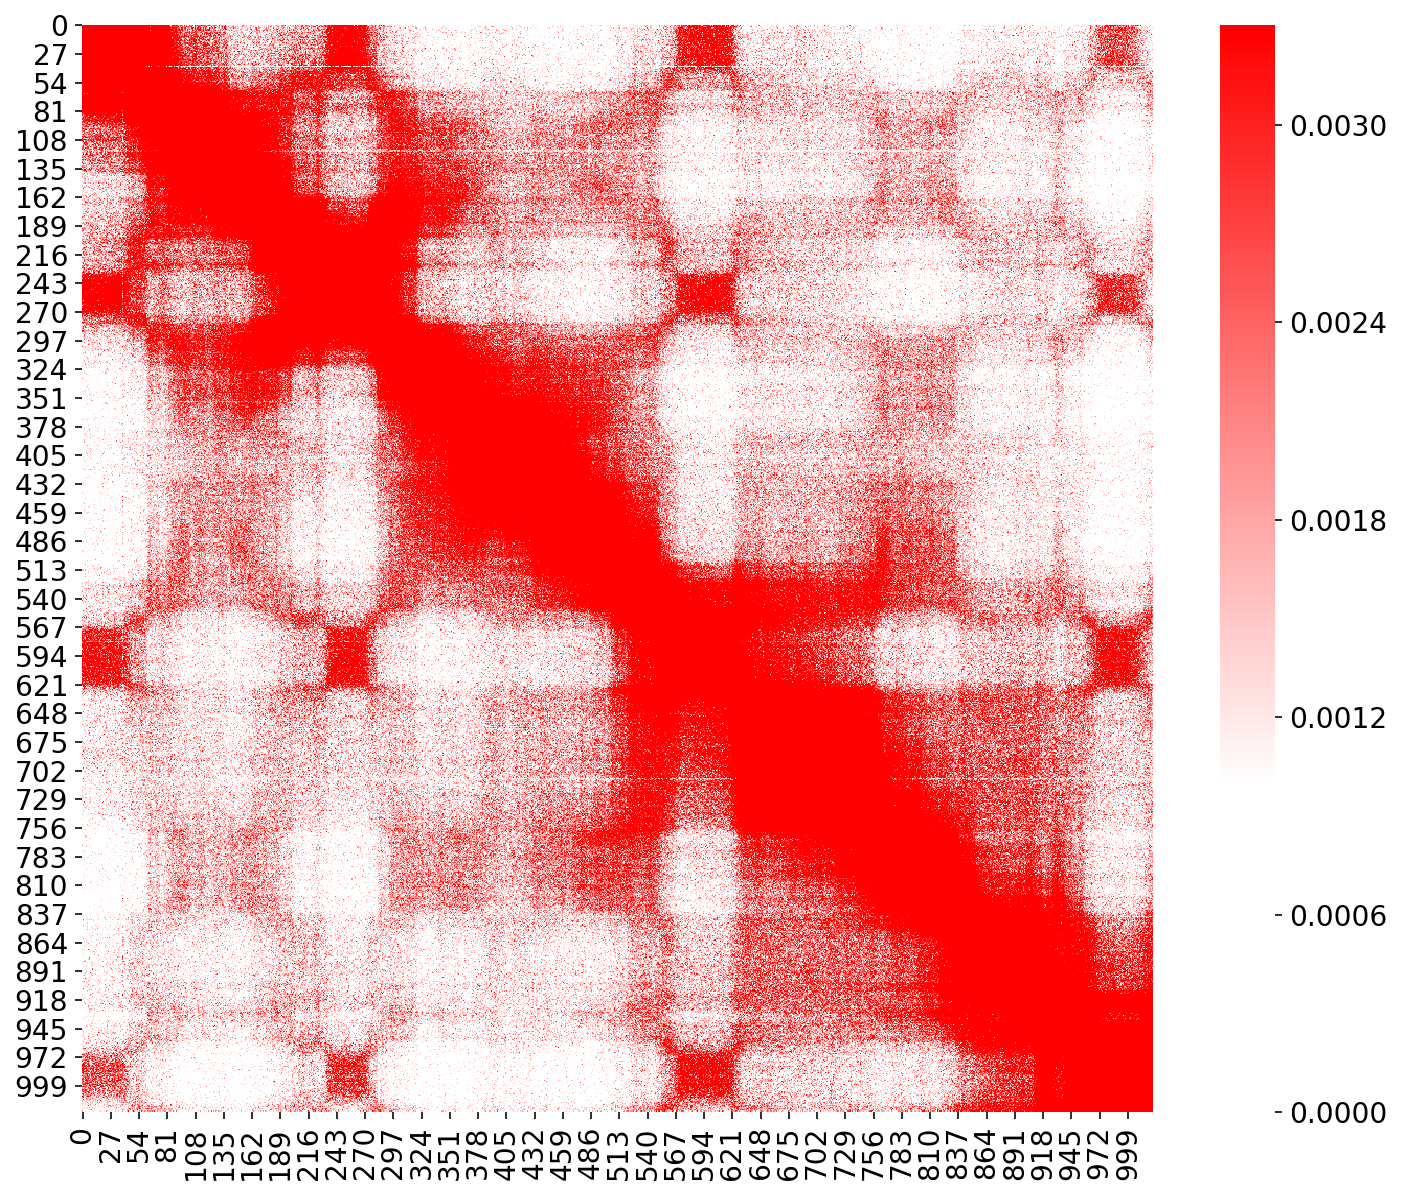

In [37]:
ep.plot_contactmap(hic, -0.06)

In [22]:
def make_goals(k, dtype="int"):
    seqs = ep.get_sequences(hic,k,False, dtype)
    obj_goal = ep.get_goals(hic, seqs)
    obj_goal_diag = ep.get_diag_goal(hic, bins=64)
    
    outfile = "goals_" + str(2*k) 
    if dtype == "int":
        outfile += "i"
    elif dtype == "float":
        outfile += "f"
    
    save_goals(outfile, seqs, obj_goal, obj_goal_diag, dtype)

    
def save_goals(outfile, seqs, obj_goal, obj_goal_diag, dtype):
    system("mkdir " + outfile)

    np.savetxt(outfile + "/obj_goal.txt", obj_goal, fmt = "%.8f")
    np.savetxt(outfile + "/obj_goal_diag.txt", obj_goal_diag, "%.8f")

    for i, seq in enumerate(seqs):
        if dtype == "int":
            np.savetxt(outfile + "/pc" + str(i) + ".txt", seq, fmt = "%d")
        elif dtype == "float":
            np.savetxt(outfile + "/pc" + str(i) + ".txt", seq, fmt = "%.4f")

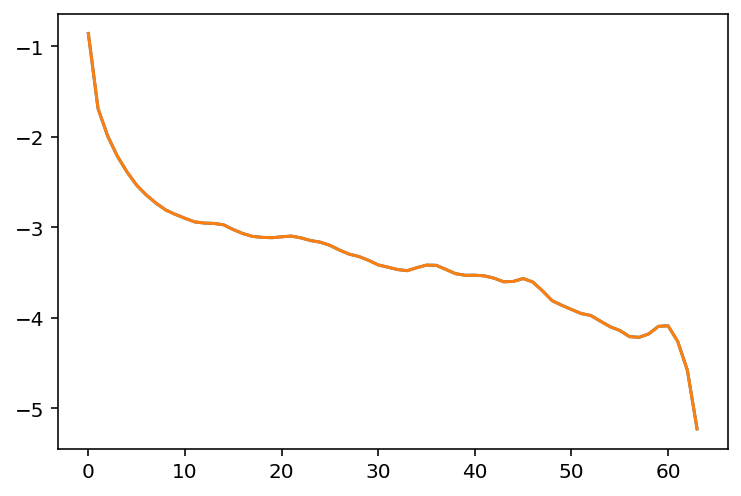

In [23]:
make_goals(2, "int")
make_goals(2, "float")

In [34]:
loaded = '''0.002602661398227167 0.00011218690059447879 0.0005226037247246172 0.0009003640917857964 0.0016252919633652613 0.00044534742522329534 0.0006313372260390981 0.0018009478940660569 0.00013377627463688114 0.0011209555671636224'''

In [35]:
loaded = loaded.split()
loaded = [float(i) for i in loaded]

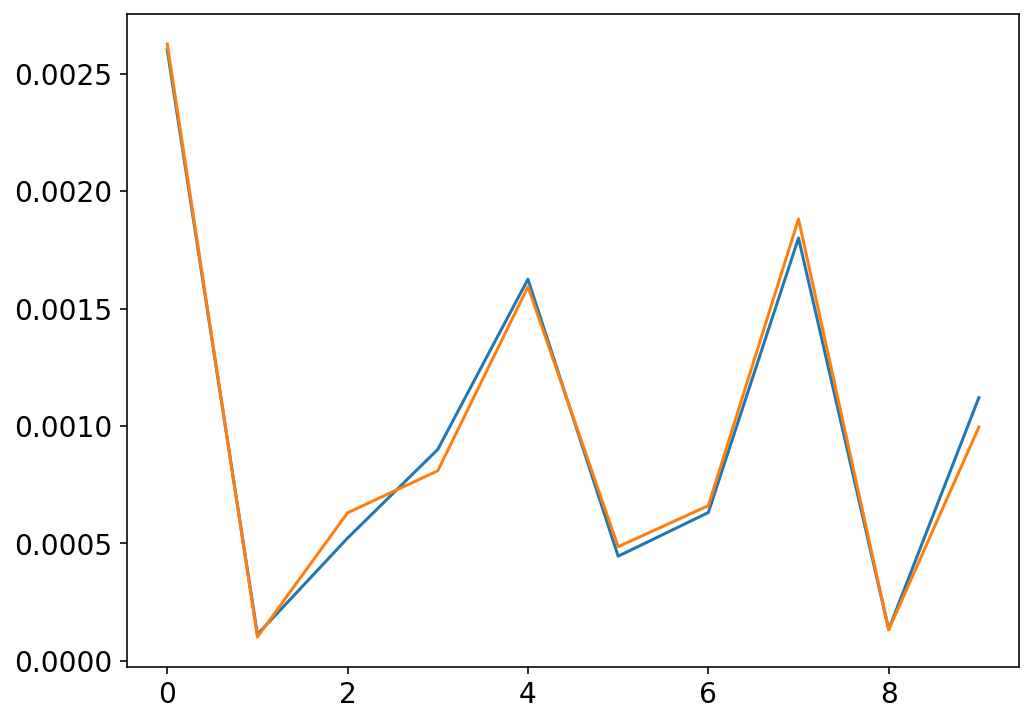

In [40]:
plt.plot(loaded)
plt.plot(obj_goal)

diag_sim is volume fraction, average of diag_observables.traj
diag_exp is p(s), average of each subdiagonal which is then downsapled to match resolution of diagonal bins
diag_mask is mask, weighted average of contact map
corrected is mask, with correction factor to match p(s)


(array([0.03509015, 0.01553542, 0.0142011 , 0.01305283, 0.01293587,
        0.01258195, 0.01062315, 0.00857409, 0.00728591, 0.00688084,
        0.00591582, 0.0046187 , 0.00334333, 0.00220997, 0.00137169,
        0.00052273]),
 array([0.02826606, 0.00607176, 0.00593946, 0.00589877, 0.0063711 ,
        0.00679176, 0.00631761, 0.00567935, 0.00547329, 0.00599124,
        0.00603776, 0.00577616, 0.00533624, 0.00488623, 0.00510438,
        0.00514753]),
 array([2.53328479e-03, 6.88833276e-04, 6.27288876e-04, 5.76832558e-04,
        5.72834580e-04, 5.57779096e-04, 4.69762424e-04, 3.77957993e-04,
        3.21160713e-04, 3.04018331e-04, 2.59967951e-04, 2.03155383e-04,
        1.46388681e-04, 9.56074796e-05, 5.89223997e-05, 2.18742147e-05]))

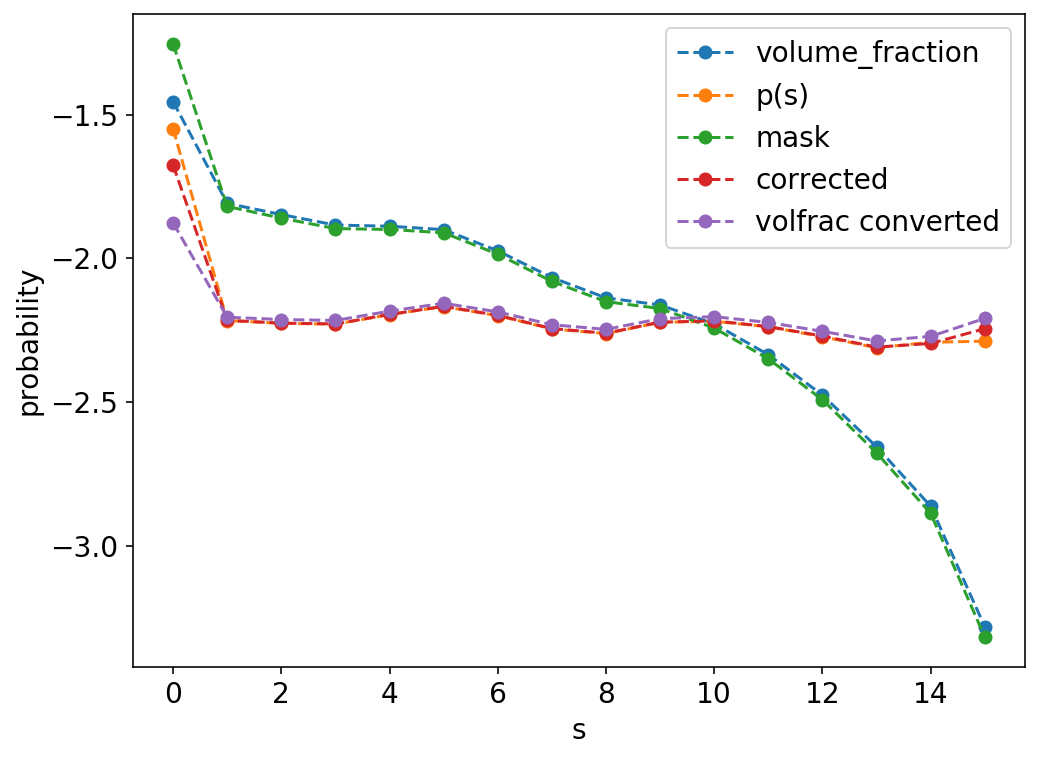

In [98]:
ep.compare_diagonal("../test/template/")

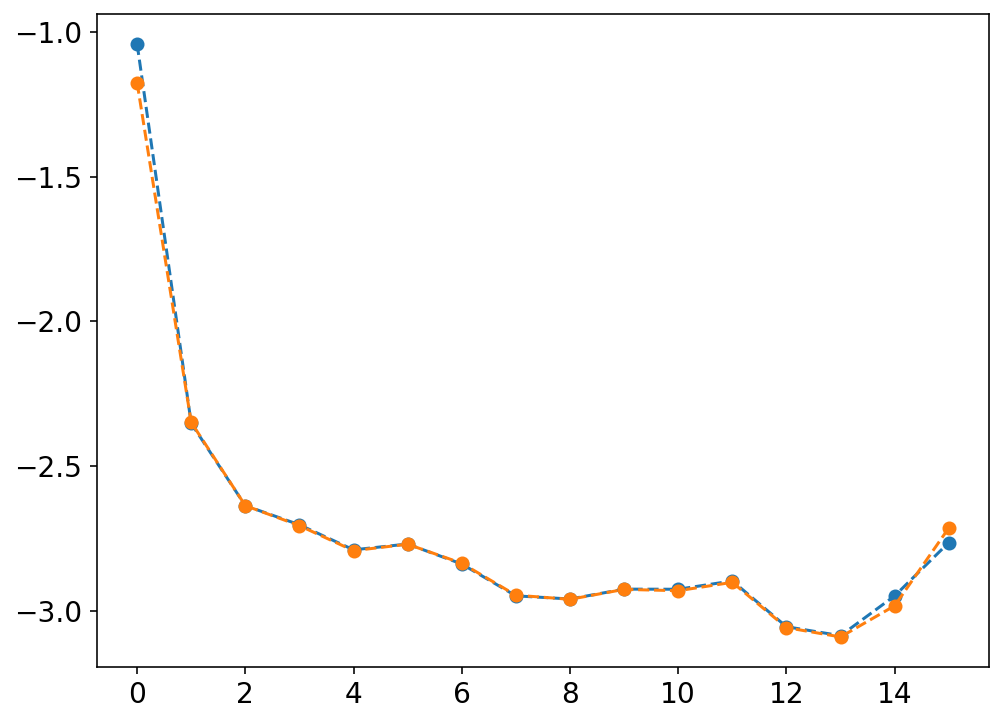

In [24]:
ep.mask_vs_diagonal(hic, bins=16)

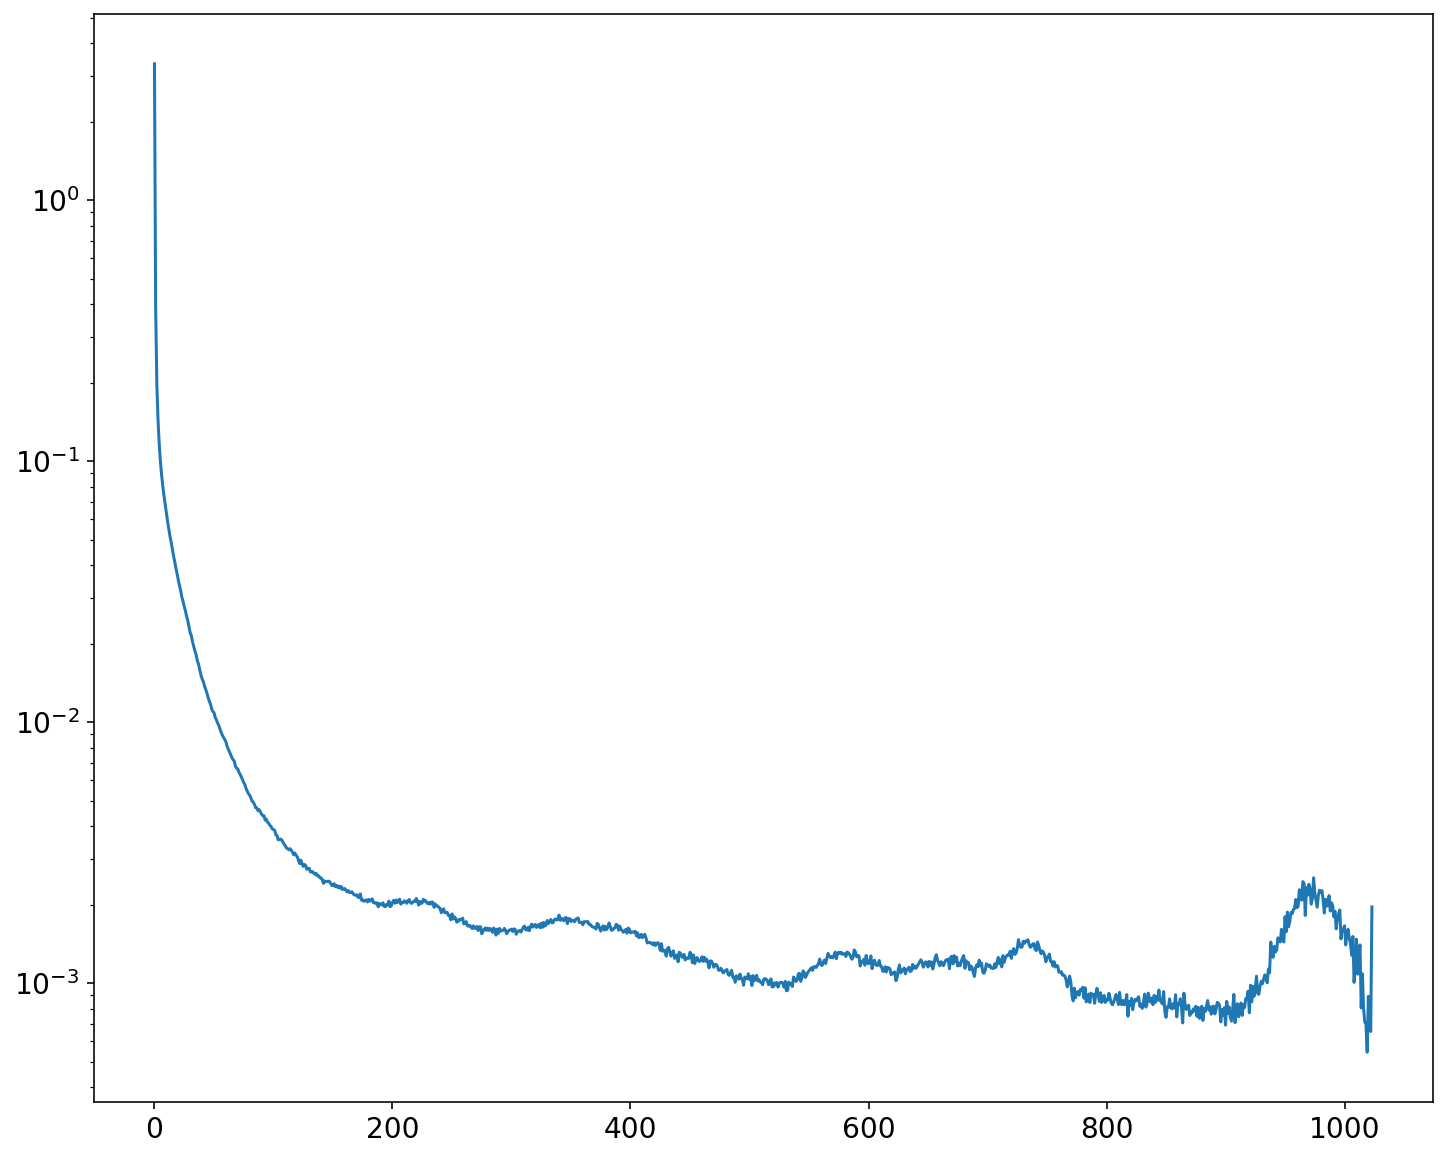

In [17]:
diagonal = ep.get_diagonal(hic, plot=True)

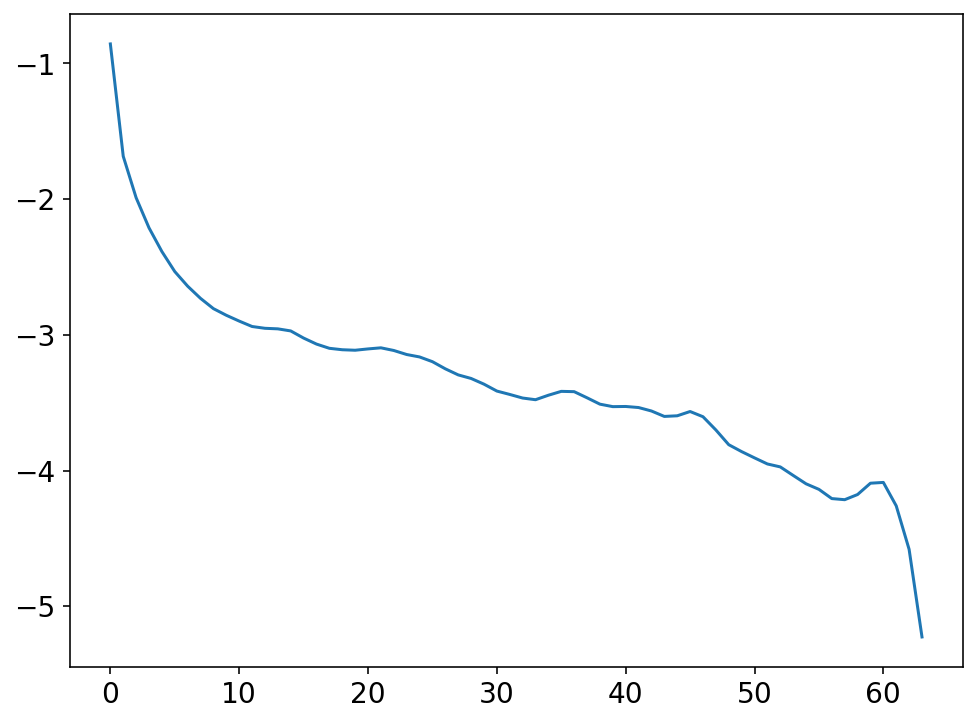

In [30]:
obj_goal_diag = ep.get_diag_goal(hic, bins=64)

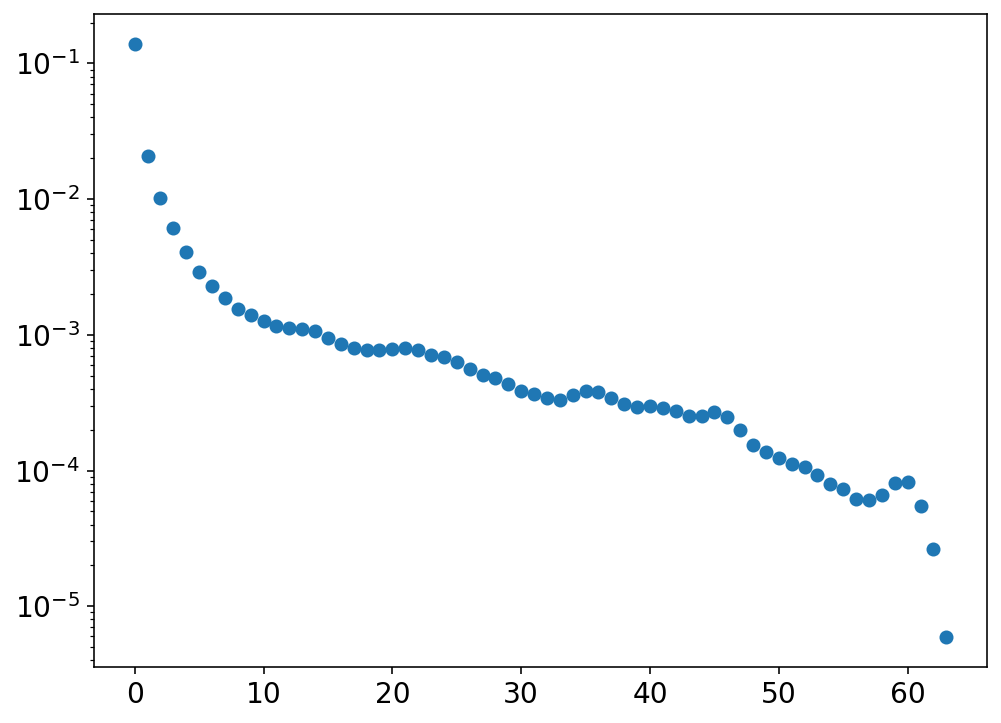

In [32]:
plt.semilogy(obj_goal_diag, 'o')

In [44]:
loaded_diag = '''0.13905515 0.02066683 0.01023050 0.00613750 0.00410514 0.00292308 0.00228079 0.00185420 0.00155837 0.00139216 0.00126142 0.00115078 0.00111613 0.00110572 0.00106739 0.00094559 0.00085394 0.00079488 0.00077575 0.00076921 0.00078670 0.00080140 0.00076603 0.00071544 0.00068649 0.00063342 0.00056122 0.00050627 0.00047655 0.00043264 0.00038482 0.00036337 0.00034186 0.00033224 0.00035851 0.00038285 0.00038090 0.00034330 0.00030811 0.00029543 0.00029626 0.00029097 0.00027437 0.00025022 0.00025292 0.00027198 0.00024897 0.00019891 0.00015489 0.00013773 0.00012385 0.00011170 0.00010624 0.00009197 0.00007976 0.00007259 0.00006207 0.00006091 0.00006650 0.00008058 0.00008166 0.00005488 0.00002623 0.00000593'''

In [45]:
loaded_diag = loaded_diag.split()
loaded_diag = [float(i) for i in loaded_diag]

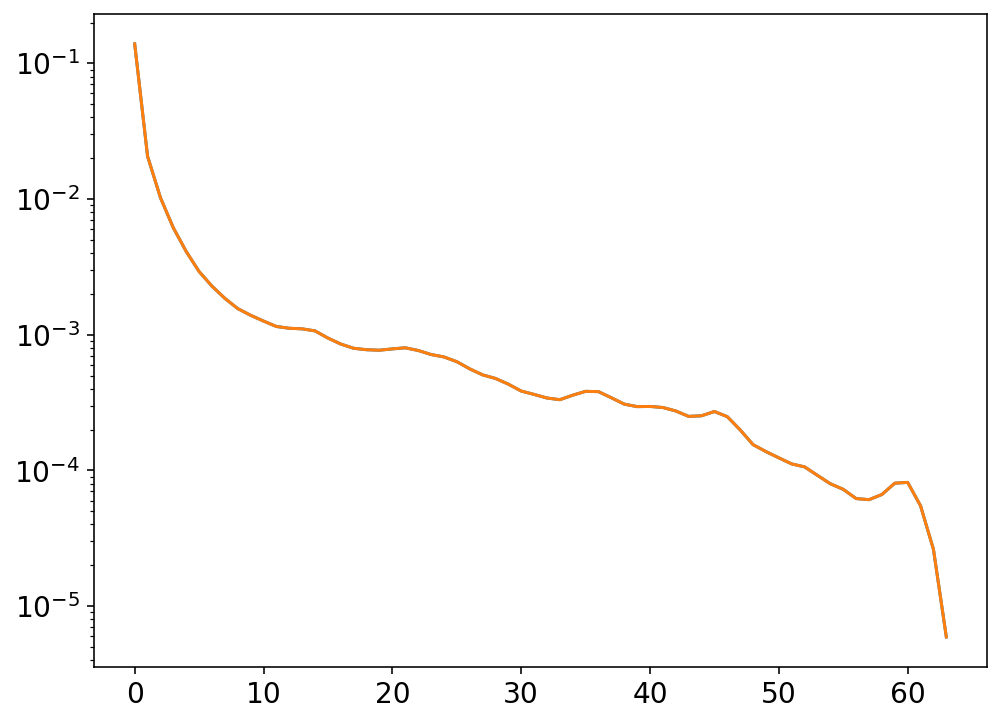

In [49]:
plt.semilogy(loaded_diag)
plt.semilogy(obj_goal_diag)